# Second Year Project

### Loading the dataset

In [0]:
from collections import Counter
import pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 12

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/Second_Year_Project/Phase_1/phase2_baby_group5.csv"

'/content/drive/My Drive/Second_Year_Project/Phase_1/phase2_baby_group5.csv'


In [0]:
df_old = pd.read_csv('/content/drive/My Drive/Second_Year_Project/Phase_1/phase2_baby_group5.csv')

### Data Preprocessing

In [5]:
df_old.head()

,Unnamed: 0,polarity,summary,reviewText,year,uuid,asin,reviewerID
0,1044,positive,"Love it, worth the money to get a good one lik...",I rented the hospital (medela) pump for the fi...,2005,1119225600B00065H55WA15Q3QEHN5JVLA,B00065H55W,A15Q3QEHN5JVLA
1,1045,negative,They do NOT stay put,This bowls are worthless. The suction cups do ...,2008,1224028800B000JOT2ROA36N62I47U9IIH,B000JOT2RO,A36N62I47U9IIH
2,1046,positive,The best.,"I love this monitor. When my son is in bed, I...",2005,1112745600B000S35QLCA18NZJT9G9DS13,B000S35QLC,A18NZJT9G9DS13
3,1047,positive,Great for about 7 months of fun and learning.,"My daughter got this for her ""shower"" and she ...",2005,1116720000B0000936LRA1UQNPIQ52PYSN,B0000936LR,A1UQNPIQ52PYSN
4,1048,positive,Works great!!! A little pricey...,This is a really great product for the carseat...,2009,1250812800B001O0DIJKA298IHWVVP98VY,B001O0DIJK,A298IHWVVP98VY


In [6]:
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
Unnamed: 0    261 non-null int64
polarity      261 non-null object
summary       261 non-null object
reviewText    261 non-null object
year          261 non-null int64
uuid          261 non-null object
asin          261 non-null object
reviewerID    261 non-null object
dtypes: int64(2), object(6)
memory usage: 16.4+ KB


#### JM - Transformation

Transforming polarity to binary variables. <br>
Hide/do not run this section if you are using polarity in any way.

In [7]:
print(df_old.polarity.unique()) # JUST CHECKING 
dummy = pd.get_dummies(df_old['polarity'], drop_first=True)

['positive' 'negative']


In [8]:
dummy[:2]

,positive
0,1
1,0


In [0]:
# Run only once every kernel execution or multiple merges occur 
df = df_old.merge(dummy, how = 'inner', left_index = True, right_index = True)
del df['polarity']
# 1 = positive 
# 0 = negative 

In [10]:
df = df[['positive', 'summary', 'reviewText', 'year']]
df = df.rename(columns = {'positive' : 'polarity'})
df[:2]

,polarity,summary,reviewText,year
0,1,"Love it, worth the money to get a good one lik...",I rented the hospital (medela) pump for the fi...,2005
1,0,They do NOT stay put,This bowls are worthless. The suction cups do ...,2008


### Data Exploration

#### JM - Plots

##### JM - Reviews by year

In [0]:
#print(df['year'].value_counts(sort=False))

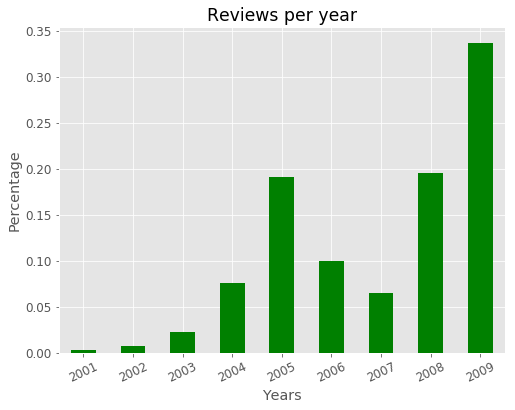

In [12]:
prob = df['year'].value_counts(normalize=True, sort=False)
threshold = 0.00001
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob.plot(kind='bar', color = 'green')
plt.xticks(rotation=25)
plt.title('Reviews per year')
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.show()

##### JM - Neg/Pos by year

In [13]:
print(df['polarity'].value_counts())

1    219
0     42
Name: polarity, dtype: int64


Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


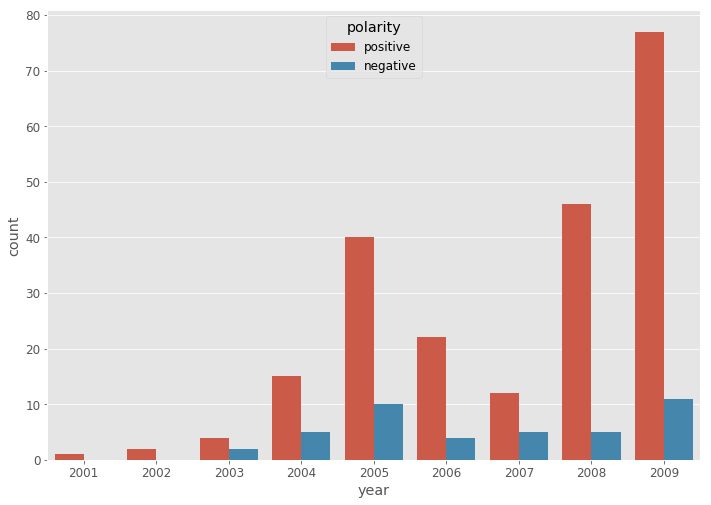

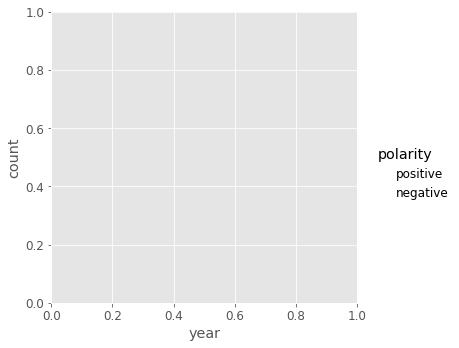

In [14]:
!pip install seaborn --upgrade
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.catplot(ax = ax, x="year", hue="polarity", kind="count", data=df_old);

##### JM - Neg by year

In [15]:
# Filtering only positive reviews 
is_0 = df['polarity'] == 0
df_neg = df[is_0]
df_neg[:2]

,polarity,summary,reviewText,year
1,0,They do NOT stay put,This bowls are worthless. The suction cups do ...,2008
12,0,Tiny,Got this just for its dual purpose of being ab...,2009


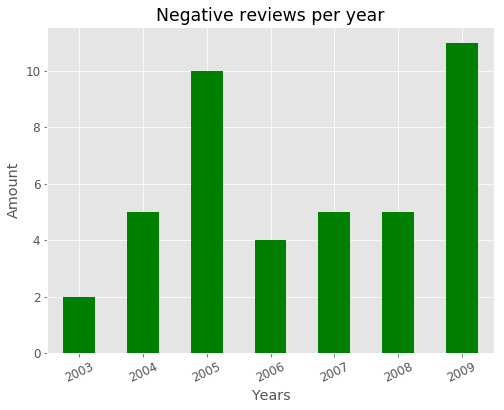

In [16]:
prob = df_neg['year'].value_counts(normalize=False, sort = False)
threshold = 0.02
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob.plot(kind='bar', color = 'green')
plt.xticks(rotation=25)
plt.title('Negative reviews per year')
plt.xlabel('Years')
plt.ylabel('Amount')
plt.show()

In [17]:
df_neg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1 to 258
Data columns (total 4 columns):
polarity      42 non-null uint8
summary       42 non-null object
reviewText    42 non-null object
year          42 non-null int64
dtypes: int64(1), object(2), uint8(1)
memory usage: 1.4+ KB


##### JM - Pos by year

In [18]:
# Filtering only negative reviews 
is_1 = df['polarity'] == 1
df_pos = df[is_1]
df_pos[:2]

,polarity,summary,reviewText,year
0,1,"Love it, worth the money to get a good one lik...",I rented the hospital (medela) pump for the fi...,2005
2,1,The best.,"I love this monitor. When my son is in bed, I...",2005


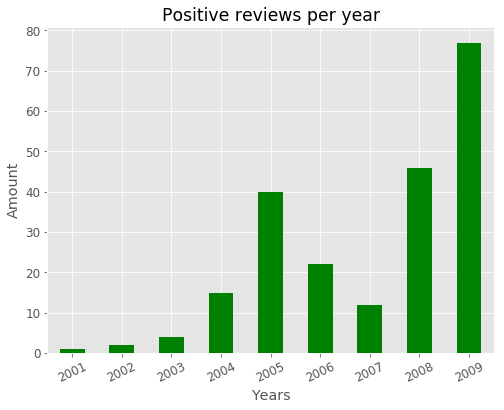

In [19]:
prob = df_pos['year'].value_counts(normalize=False, sort = False)
threshold = 0.02
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob.plot(kind='bar', color = 'green')
plt.xticks(rotation=25)
plt.title('Positive reviews per year')
plt.xlabel('Years')
plt.ylabel('Amount')
plt.show()

### JM - Exploration (summary)

#### JM - Word Frequency by polarity

In [0]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk import sent_tokenize
from nltk.corpus import stopwords
#nltk.download("popular")
tt = TweetTokenizer()
#

In [0]:
df_old = df_old.fillna('')
df_old.isnull().values.any()
df_word = df_old.copy()
df_word_freq = df_old.copy()
#df_word['summary']

In [0]:
##df_word['words'] = df.apply(lambda x: tokenize(df_word['words']))

In [0]:
# Different standard tokenizers

df_word['words'] = df_word.summary.apply(tt.tokenize) # Tweet tokenizer 
#df_word['words'] = df_word.summary.apply(word_tokenize) # Word tokenizer by NLTK
#df_word['words'] = df_word.summary.str.strip().str.split('[\W_]+') # Word tokenizer 

In [37]:
df_word[:1]

,Unnamed: 0,polarity,summary,reviewText,year,uuid,asin,reviewerID,words
0,1044,positive,"Love it, worth the money to get a good one lik...",I rented the hospital (medela) pump for the fi...,2005,1119225600B00065H55WA15Q3QEHN5JVLA,B00065H55W,A15Q3QEHN5JVLA,"[Love, it, ,, worth, the, money, to, get, a, g..."


In [0]:
rows = list()
for row in df_word[['polarity', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.polarity, word))
words = pd.DataFrame(rows, columns=['polarity', 'word'])

# Removing words with less than 0
words = words[words.word.str.len() > 0] 
words['word'] = words.word.str.lower()

In [25]:
# Calculating terms per polarity
counts = words.groupby('polarity')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
counts.head()

n_w
polarity word     
negative !      13
         not     9
         a       6
         it      5
         work    5

n_w
polarity word      
negative !       13
         not      9
         a        6
         it       5
positive !       96
         great   54
         for     36
         it      28

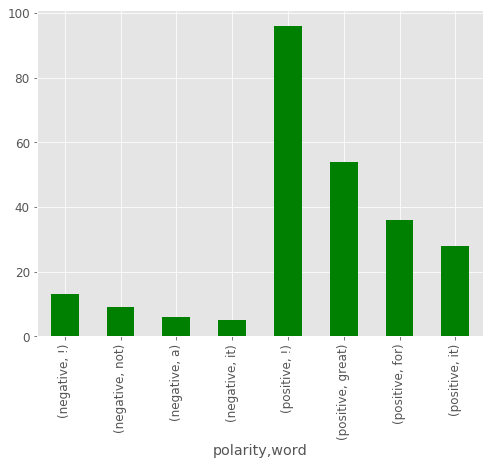

In [26]:
def plot_top_n(series, top_n=4, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
    r.plot.bar(color = 'green')
    return r.to_frame()


plot_top_n(counts['n_w'])

In [27]:
# Total word count for each polarity
word_sum = counts.groupby(level=0)\
    .sum()\
    .rename(columns={'n_w': 'n_d'})
word_sum

,n_d
polarity,
negative,214
positive,1099


In [28]:
word_sum.sum()

n_d    1313
dtype: int64

In [29]:
def word_count(sentence):
    return len(sentence.split())
    
df_word_freq['word_count'] = df_word_freq['summary'].apply(word_count)
df_word_freq[:1]

,Unnamed: 0,polarity,summary,reviewText,year,uuid,asin,reviewerID,word_count
0,1044,positive,"Love it, worth the money to get a good one lik...",I rented the hospital (medela) pump for the fi...,2005,1119225600B00065H55WA15Q3QEHN5JVLA,B00065H55W,A15Q3QEHN5JVLA,12


In [0]:
test = df_word_freq['word_count'] == 1
df_test = df[test]

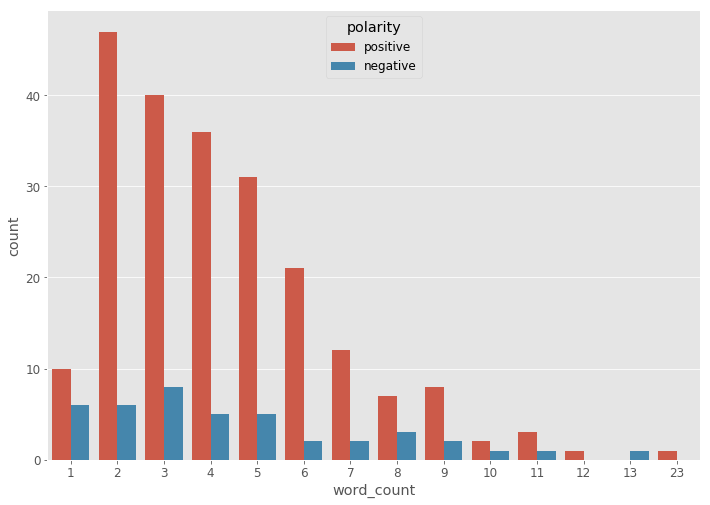

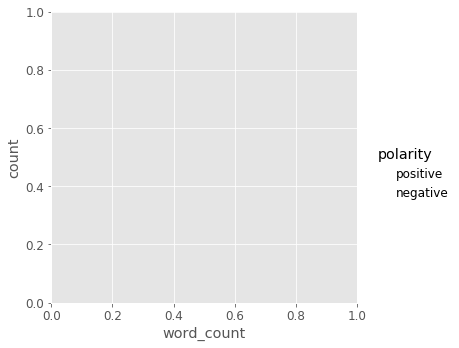

In [31]:
# Numbers of word count in summary by polarity

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.catplot(ax=ax, x="word_count", hue="polarity", kind="count", data=df_word_freq);

#### JM - Word Frequency by distribution

In [32]:
all_words = []
for line in list(df_word_freq['summary']):
    words = line.split()
    
    for word in words:
        all_words.append(word.lower())
Counter(all_words).most_common(10)

[('great', 53),
 ('for', 36),
 ('the', 32),
 ('love', 27),
 ('a', 27),
 ('and', 20),
 ('to', 16),
 ('it!', 16),
 ('this', 15),
 ('good', 13)]

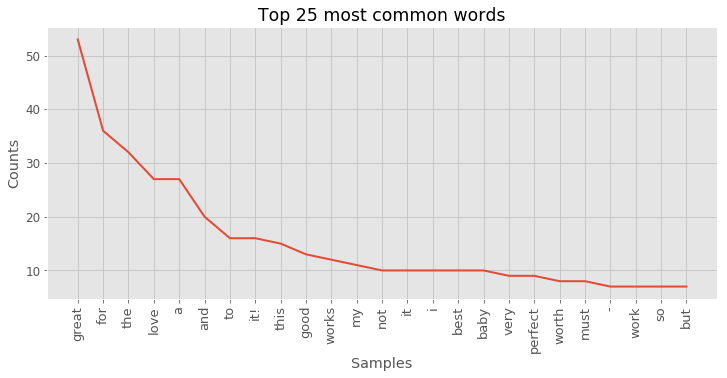

Text(0.5, 1.0, 'log-log plot of words frequency')

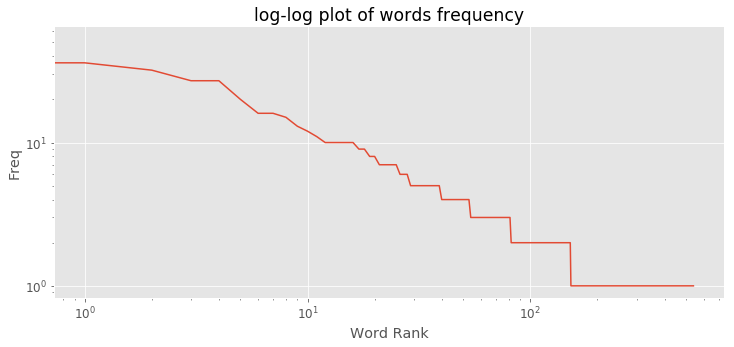

In [33]:
# Frequency distribution of most common words 
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

Tokenizer #almost fully optimized

In [0]:
from nltk.tokenize import TweetTokenizer
import re

def grp5tokenize(string):
    """
    takes string input and tokenizes into a list of strings. 
    If runtime is slow move tknzr out of function and call for it in the input. 
    This is highly unlikely given that function runs in O(1) = constant time.  
    """
    
    string = re.sub('\&quot;', '', string)
    
    tknzr = TweetTokenizer(preserve_case = False, strip_handles = True, reduce_len = True)
    tokens = tknzr.tokenize(string)
    return tokens

### JM - Exploration (Review)